In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/Users/lpddangal/Documents/Practical_Linear_Regression_Model_Python/insurance.csv')

In [2]:
# Preview top 5 rows using head()
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
ls

Insureance_linear_regression.ipynb
Scenario_Based_Linear_Regression_Python.ipynb
insurance.csv
kc_house_data.csv
kc_house_data.csv.zip
mtcars.csv
requirements.txt


# Columns info

In [5]:
#Lets first understand the basic information about this data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
len(df.columns)

7

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.shape[1]

7

# Row info

In [10]:
df.shape

(1338, 7)

In [11]:
len(df.index)

1338

In [12]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [13]:
len(df)

1338

In [14]:
df.shape[0]

1338

# Categorical data 

In [15]:
cat_df = df.select_dtypes(include=['object'])
#cat_df = df.select_dtypes(exclude=[np.number])
#cat_df = df.select_dtypes(include = 'category')
cat_df.columns



Index(['sex', 'smoker', 'region'], dtype='object')

In [16]:
cat_df.dtypes

sex       object
smoker    object
region    object
dtype: object

In [17]:
cat_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [18]:
cat_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [19]:
cat_df['region'].value_counts(normalize = True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

In [20]:
df['region'].value_counts(normalize = True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

In [21]:
cat_df.head()

sex smoker     region
0  female    yes  southwest
1    male     no  southeast
2    male     no  southeast
3    male     no  northwest
4    male     no  northwest

In [22]:
#fifth row
cat_df.values[5]


array(['female', 'no', 'southeast'], dtype=object)

In [23]:
cat_df.describe()

sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

In [24]:
cat_df.sort_values(by ='smoker').head()

sex smoker     region
556     male     no  northeast
724   female     no  northeast
1197    male     no  southeast
726     male     no  northwest
728   female     no  northeast

In [25]:
cat_df['sex'].min()

'female'

In [26]:
cat_df['smoker'].min()

'no'

In [27]:
cat_df['region'].min()

'northeast'

In [28]:
cat_df['region'].max()

'southwest'

In [29]:
df.describe(include='object')

sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

In [30]:
df.describe(include='all')

age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13270.422265  
std     12110.011237  
min      1121.873900  
25%      4740.287150  
50%      9382.033000  
75%     16639.912515  
max     63770.428010

In [31]:
pd.crosstab(index=df["sex"], columns=df["smoker"],margins=False)

smoker   no  yes
sex             
female  547  115
male    517  159

In [32]:
pd.crosstab(index=df["sex"], columns=df["smoker"],margins=True)

smoker    no  yes   All
sex                    
female   547  115   662
male     517  159   676
All     1064  274  1338

In [33]:
pd.crosstab(index=df["region"], columns=df["smoker"],margins=True)

smoker       no  yes   All
region                    
northeast   257   67   324
northwest   267   58   325
southeast   273   91   364
southwest   267   58   325
All        1064  274  1338

In [67]:
pd.crosstab(index=df["sex"], columns=df["region"],margins=True, normalize=True)

region  northeast  northwest  southeast  southwest   All
sex                                                     
0            0.12       0.12       0.13       0.12  0.49
1            0.12       0.12       0.14       0.12  0.51
All          0.24       0.24       0.27       0.24  1.00

In [35]:
set(df['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [36]:
len(set(df['region']))

4

<AxesSubplot:xlabel='sex', ylabel='count'>

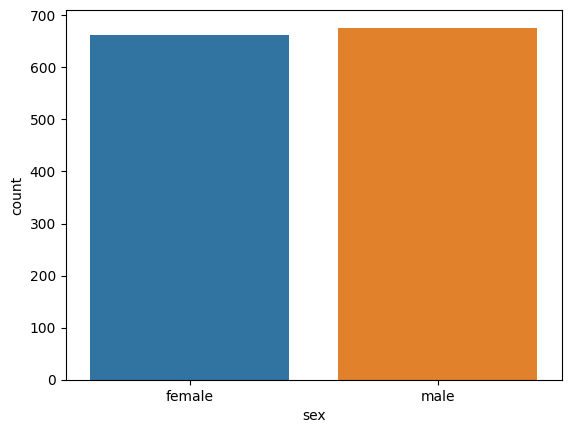

In [37]:
sns.countplot(x='sex',data=cat_df)

<AxesSubplot:xlabel='region', ylabel='count'>

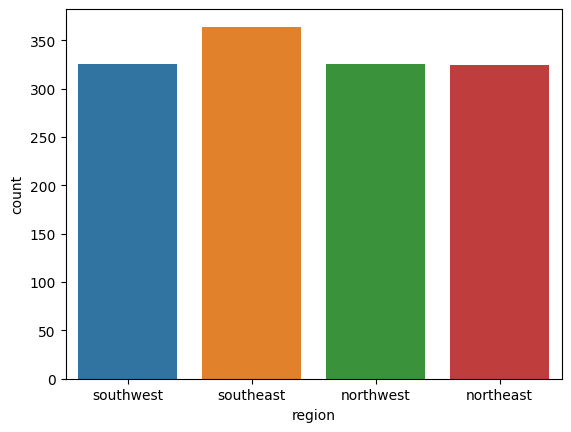

In [38]:
sns.countplot(x='region',data=cat_df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

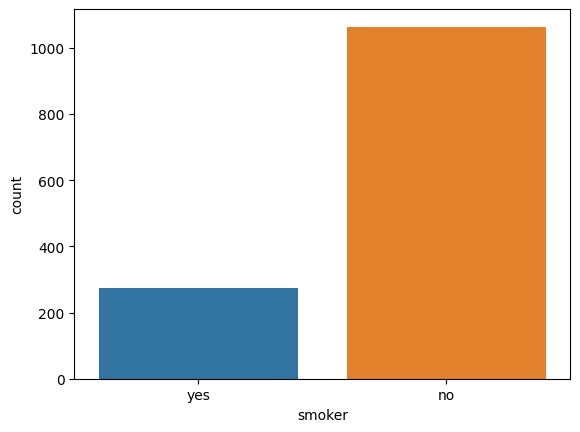

In [39]:
sns.countplot(x='smoker',data=cat_df)

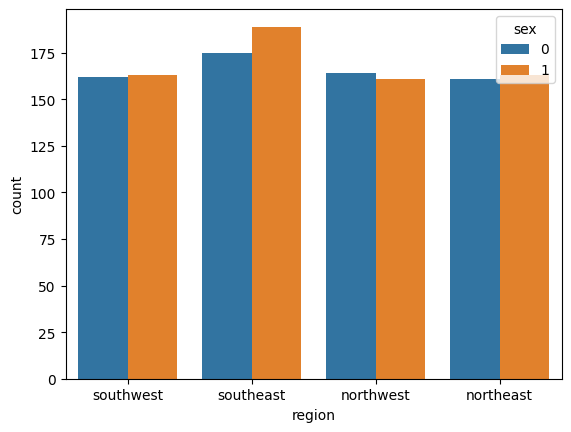

In [68]:
sns.countplot(x="region", hue="sex", data=df);

# Numerical data

In [40]:
num_df = df.select_dtypes(include=[np.number])
num_df.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [41]:
num_df.dtypes

age           int64
bmi         float64
children      int64
charges     float64
dtype: object

In [42]:
num_df.tail(5)

age    bmi  children     charges
1333   50  30.97         3  10600.5483
1334   18  31.92         0   2205.9808
1335   18  36.85         0   1629.8335
1336   21  25.80         0   2007.9450
1337   61  29.07         0  29141.3603

In [70]:
num_df.head(5)

age    bmi  children   charges
0   19  27.90         0  16884.92
1   18  33.77         1   1725.55
2   28  33.00         3   4449.46
3   33  22.70         0  21984.47
4   32  28.88         0   3866.86

In [44]:
num_df.shape

(1338, 4)

In [45]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [46]:
df.pivot_table(index='region', columns='sex', values='charges', aggfunc='max')


sex             female         male
region                             
northeast  58571.07448  48549.17835
northwest  55135.40209  60021.39897
southeast  63770.42801  62592.87309
southwest  48824.45000  52590.82939

In [47]:
df.pivot_table(index='children', values='charges', aggfunc='sum')

charges
children              
0         7.098070e+06
1         4.124900e+06
2         3.617655e+06
3         2.410785e+06
4         3.462664e+05
5         1.581486e+05

In [48]:
df.pivot_table(index='children', columns='sex', values='charges', aggfunc='max')

sex            female         male
children                          
0         63770.42801  62592.87309
1         58571.07448  51194.55914
2         47305.30500  49577.66240
3         46661.44240  60021.39897
4         36580.28216  40182.24600
5         19023.26000  14478.33015

In [49]:
df.pivot_table(index='children', columns='sex', values='charges', aggfunc=['sum','mean','min','max'])

sum                        mean                      min  \
sex             female          male        female          male     female   
children                                                                      
0         3.440751e+06  3.657319e+06  11905.714276  12832.696736  1607.5101   
1         1.921495e+06  2.203405e+06  12161.360414  13273.522458  2201.0971   
2         1.659017e+06  1.958639e+06  13941.317326  16187.095325  2801.2588   
3         1.067652e+06  1.343133e+06  13865.605066  16789.167419  4234.9270   
4         1.533144e+05  1.929520e+05  13937.674562  13782.284829  4561.1885   
5         7.883205e+04  7.931658e+04   9854.006419   7931.658310  4687.7970   

                              max               
sex             male       female         male  
children                                        
0         1121.87390  63770.42801  62592.87309  
1         1711.02680  58571.07448  51194.55914  
2         2304.00220  47305.30500  49577.66240  
3         3443.06400  46661.44240  60021.39897  
4         4504.66240  36580.28216  40182.24600  
5         4915.05985  19023.26000  14478.33015

In [50]:
df.groupby('sex').agg({'charges':'sum'})

charges
sex                 
female  8.321061e+06
male    9.434764e+06

In [51]:
df.groupby('smoker').agg({'charges':'count'})

charges
smoker         
no         1064
yes         274

In [52]:
df.groupby(['sex']).agg({'charges':['sum','max','count']})

charges                   
                 sum          max count
sex                                    
female  8.321061e+06  63770.42801   662
male    9.434764e+06  62592.87309   676

In [53]:
df.groupby(['sex','region']).agg({'charges':'count'})

charges
sex    region            
female northeast      161
       northwest      164
       southeast      175
       southwest      162
male   northeast      163
       northwest      161
       southeast      189
       southwest      163

In [54]:
df.groupby(["sex"])['bmi','charges'].describe(percentiles=[])

bmi                                              charges  \
        count       mean       std     min      50%    max   count   
sex                                                                  
female  662.0  30.377749  6.046023  16.815  30.1075  48.07   662.0   
male    676.0  30.943129  6.140435  15.960  30.6875  53.13   676.0   

                                                                        
                mean           std        min         50%          max  
sex                                                                     
female  12569.578844  11128.703801  1607.5101  9412.96250  63770.42801  
male    13956.751178  12971.025915  1121.8739  9369.61575  62592.87309

In [55]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [56]:
df.sort_values(by='region', ascending = False).head()

age     sex   bmi  children smoker     region    charges
0     19  female  27.9         0    yes  southwest  16884.924
304   57  female  38.0         2     no  southwest  12646.207
861   38  female  28.0         3     no  southwest   7151.092
864   51    male  25.4         0     no  southwest   8782.469
865   40    male  29.9         2     no  southwest   6600.361

In [57]:
pd.set_option("display.precision", 2)
df["charges"].mean()

13270.422265141257

In [58]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Record analysis

In [59]:
df.iloc[100:200,]

age     sex    bmi  children smoker     region   charges
100   41  female  31.60         0     no  southwest   6186.13
101   30    male  25.46         0     no  northeast   3645.09
102   18  female  30.11         0     no  northeast  21344.85
103   61  female  29.92         3    yes  southeast  30942.19
104   34  female  27.50         1     no  southwest   5003.85
..   ...     ...    ...       ...    ...        ...       ...
195   19    male  30.59         0     no  northwest   1639.56
196   39  female  32.80         0     no  southwest   5649.72
197   45  female  28.60         2     no  southeast   8516.83
198   51  female  18.05         0     no  northwest   9644.25
199   64  female  39.33         0     no  northeast  14901.52

[100 rows x 7 columns]

In [60]:
df.iloc[100:200,0:4]

age     sex    bmi  children
100   41  female  31.60         0
101   30    male  25.46         0
102   18  female  30.11         0
103   61  female  29.92         3
104   34  female  27.50         1
..   ...     ...    ...       ...
195   19    male  30.59         0
196   39  female  32.80         0
197   45  female  28.60         2
198   51  female  18.05         0
199   64  female  39.33         0

[100 rows x 4 columns]

In [61]:
#last row
df[-1:]
df.tail(1)

age     sex    bmi  children smoker     region   charges
1337   61  female  29.07         0    yes  northwest  29141.36

In [62]:
#first row
df[:1]
df.head(1)

age     sex   bmi  children smoker     region   charges
0   19  female  27.9         0    yes  southwest  16884.92

In [63]:
#apply function to each column
df.apply(np.max)

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges      63770.43
dtype: object

In [64]:
#apply function to each row
df[df["region"].apply(lambda region: region[0]=="s")].head()


age     sex    bmi  children smoker     region   charges
0   19  female  27.90         0    yes  southwest  16884.92
1   18    male  33.77         1     no  southeast   1725.55
2   28    male  33.00         3     no  southeast   4449.46
5   31  female  25.74         0     no  southeast   3756.62
6   46  female  33.44         1     no  southeast   8240.59

In [65]:
df.head()

age     sex    bmi  children smoker     region   charges
0   19  female  27.90         0    yes  southwest  16884.92
1   18    male  33.77         1     no  southeast   1725.55
2   28    male  33.00         3     no  southeast   4449.46
3   33    male  22.70         0     no  northwest  21984.47
4   32    male  28.88         0     no  northwest   3866.86

In [66]:
#mapping sex male->1, female->0
d = {"male": 1, "female":0 }
df["sex"] = df["sex"].map(d)
df.head()

#df.replace({"sex":d})

age  sex    bmi  children smoker     region   charges
0   19    0  27.90         0    yes  southwest  16884.92
1   18    1  33.77         1     no  southeast   1725.55
2   28    1  33.00         3     no  southeast   4449.46
3   33    1  22.70         0     no  northwest  21984.47
4   32    1  28.88         0     no  northwest   3866.86

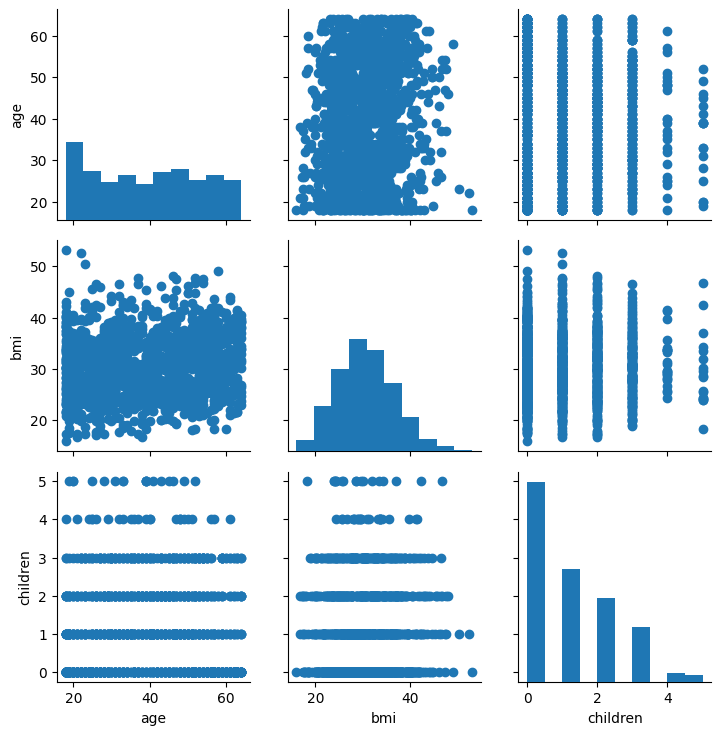

In [74]:
import matplotlib.pyplot as plt
#get_ipython().run_line_magic('matplotlib', 'inline')
g = sns.PairGrid(df[[ 'age',  'bmi', 'children']])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


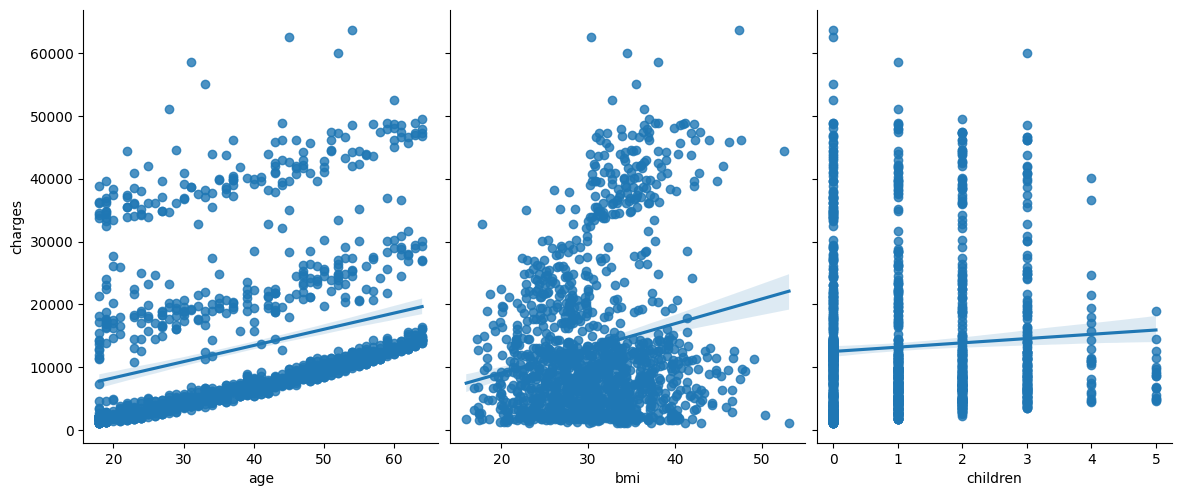

In [76]:
sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars=["charges"],
             height=5, aspect=.8, kind="reg");

<AxesSubplot:xlabel='region', ylabel='charges'>

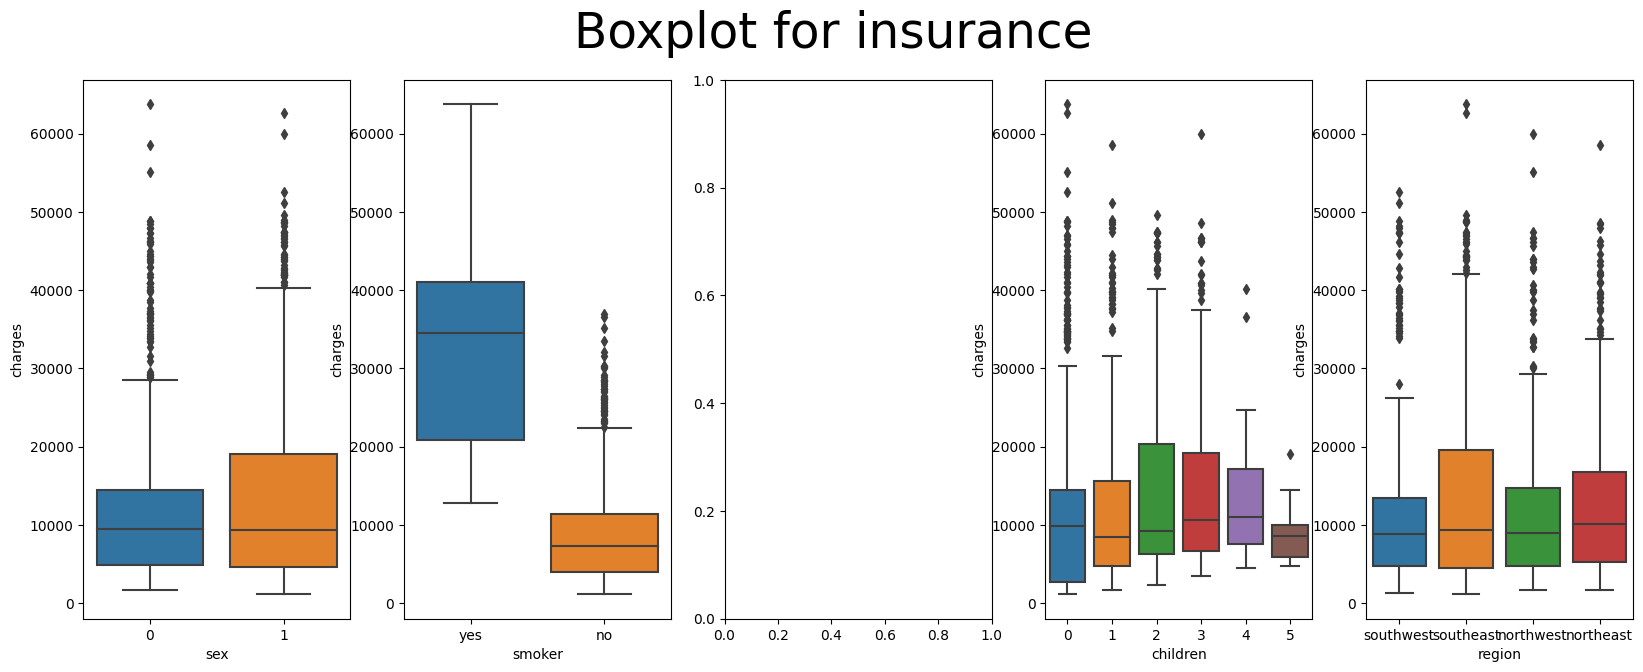

In [80]:
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,7))

fig.suptitle("Boxplot for insurance", fontsize=35)

sns.boxplot(x="sex", y="charges", data=df,ax=ax1)
sns.boxplot(x="smoker", y="charges", data=df,ax=ax2)
sns.boxplot(x="children", y="charges", data=df,ax=ax4)
sns.boxplot(x="region", y="charges", data=df,ax=ax5)

<AxesSubplot:xlabel='region', ylabel='count'>

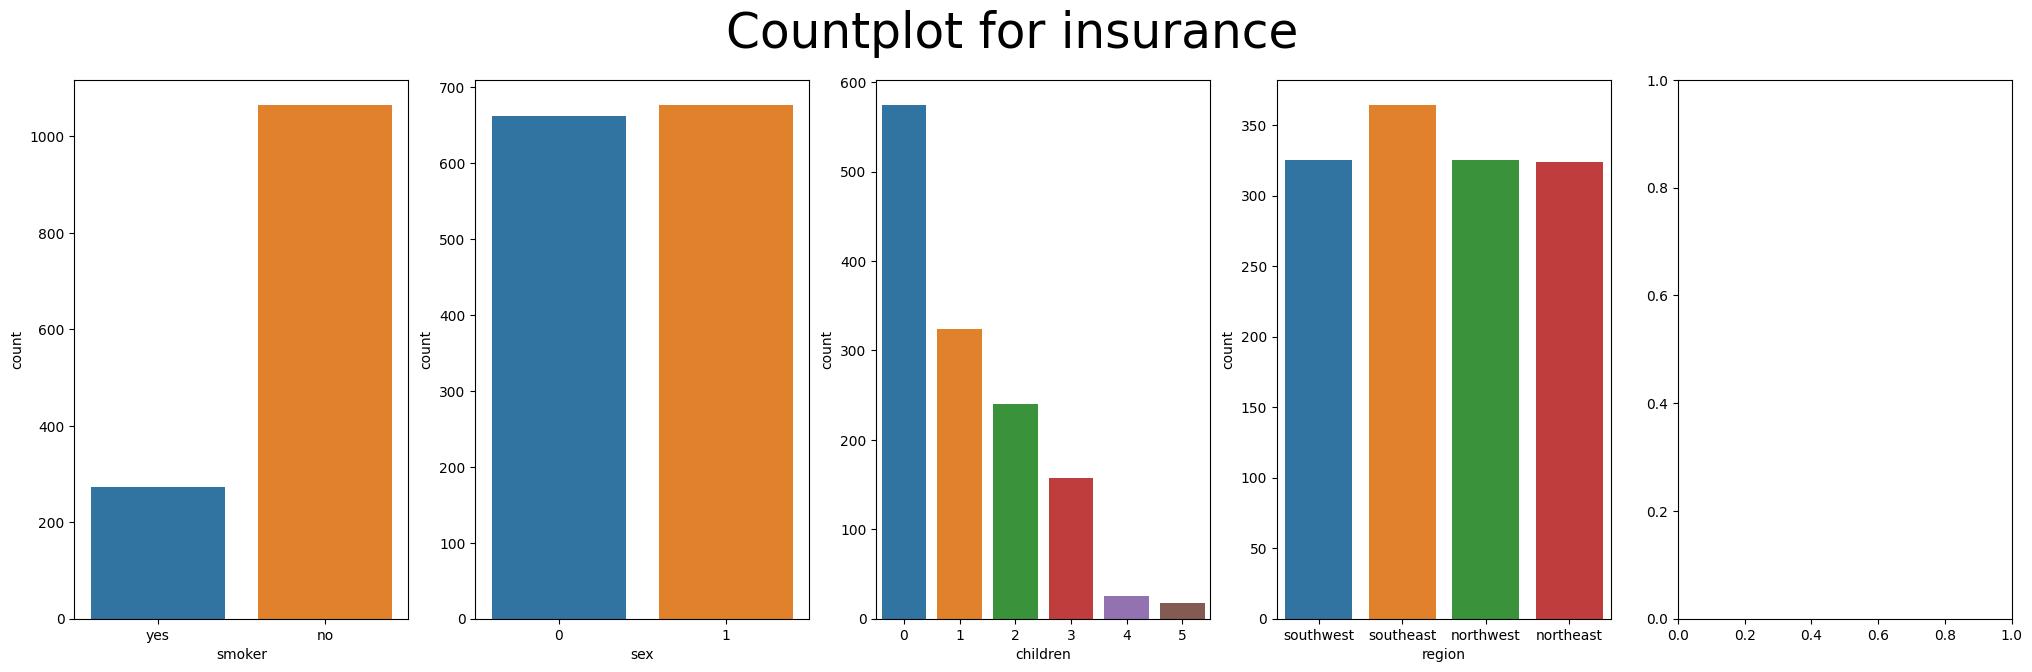

In [82]:
## Countplot for categorical variables
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5,figsize=(25,7))

fig.suptitle("Countplot for insurance", fontsize=35)

sns.countplot(x="smoker", data=df,ax=ax1)
sns.countplot(x="sex", data=df,ax=ax2)
sns.countplot(x="children", data=df,ax=ax3)
sns.countplot(x="region", data=df,ax=ax4)


In [83]:
## Correlation Matrix
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

# null values and missing values

In [84]:
#null values columns wise
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [85]:
#total nul values in df
df.isnull().sum().sum()

0

In [96]:
df.replace(np.nan,0)

age  sex    bmi  children smoker     region   charges
0      19    0  27.90         0    yes  southwest  16884.92
1      18    1  33.77         1     no  southeast   1725.55
2      28    1  33.00         3     no  southeast   4449.46
3      33    1  22.70         0     no  northwest  21984.47
4      32    1  28.88         0     no  northwest   3866.86
...   ...  ...    ...       ...    ...        ...       ...
1333   50    1  30.97         3     no  northwest  10600.55
1334   18    0  31.92         0     no  northeast   2205.98
1335   18    0  36.85         0     no  southeast   1629.83
1336   21    0  25.80         0     no  southwest   2007.94
1337   61    0  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [86]:
#drop full rows having any single null values
df.dropna()

age  sex    bmi  children smoker     region   charges
0      19    0  27.90         0    yes  southwest  16884.92
1      18    1  33.77         1     no  southeast   1725.55
2      28    1  33.00         3     no  southeast   4449.46
3      33    1  22.70         0     no  northwest  21984.47
4      32    1  28.88         0     no  northwest   3866.86
...   ...  ...    ...       ...    ...        ...       ...
1333   50    1  30.97         3     no  northwest  10600.55
1334   18    0  31.92         0     no  northeast   2205.98
1335   18    0  36.85         0     no  southeast   1629.83
1336   21    0  25.80         0     no  southwest   2007.94
1337   61    0  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [87]:
#drop full columns contaiaing any single null
df.dropna(axis='columns')
df.dropna(axis='columns', how = 'any')

age  sex    bmi  children smoker     region   charges
0      19    0  27.90         0    yes  southwest  16884.92
1      18    1  33.77         1     no  southeast   1725.55
2      28    1  33.00         3     no  southeast   4449.46
3      33    1  22.70         0     no  northwest  21984.47
4      32    1  28.88         0     no  northwest   3866.86
...   ...  ...    ...       ...    ...        ...       ...
1333   50    1  30.97         3     no  northwest  10600.55
1334   18    0  31.92         0     no  northeast   2205.98
1335   18    0  36.85         0     no  southeast   1629.83
1336   21    0  25.80         0     no  southwest   2007.94
1337   61    0  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [88]:
df.dropna(axis='columns', how = 'all')


age  sex    bmi  children smoker     region   charges
0      19    0  27.90         0    yes  southwest  16884.92
1      18    1  33.77         1     no  southeast   1725.55
2      28    1  33.00         3     no  southeast   4449.46
3      33    1  22.70         0     no  northwest  21984.47
4      32    1  28.88         0     no  northwest   3866.86
...   ...  ...    ...       ...    ...        ...       ...
1333   50    1  30.97         3     no  northwest  10600.55
1334   18    0  31.92         0     no  northeast   2205.98
1335   18    0  36.85         0     no  southeast   1629.83
1336   21    0  25.80         0     no  southwest   2007.94
1337   61    0  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [110]:
df.dropna(axis='rows', thresh=3)
df.dropna(axis=0, thresh=3)


age  sex    bmi  children smoker     region   charges
0      19    0  27.90         0    yes  southwest  16884.92
1      18    1  33.77         1     no  southeast   1725.55
2      28    1  33.00         3     no  southeast   4449.46
3      33    1  22.70         0     no  northwest  21984.47
4      32    1  28.88         0     no  northwest   3866.86
...   ...  ...    ...       ...    ...        ...       ...
1333   50    1  30.97         3     no  northwest  10600.55
1334   18    0  31.92         0     no  northeast   2205.98
1335   18    0  36.85         0     no  southeast   1629.83
1336   21    0  25.80         0     no  southwest   2007.94
1337   61    0  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [90]:
df.fillna(0, inplace=True)

age  sex    bmi  children smoker     region   charges
0      19    0  27.90         0    yes  southwest  16884.92
1      18    1  33.77         1     no  southeast   1725.55
2      28    1  33.00         3     no  southeast   4449.46
3      33    1  22.70         0     no  northwest  21984.47
4      32    1  28.88         0     no  northwest   3866.86
...   ...  ...    ...       ...    ...        ...       ...
1333   50    1  30.97         3     no  northwest  10600.55
1334   18    0  31.92         0     no  northeast   2205.98
1335   18    0  36.85         0     no  southeast   1629.83
1336   21    0  25.80         0     no  southwest   2007.94
1337   61    0  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [97]:
#replace nan by Kathmandu
df["bmi"].fillna("Kathmandu",inplace=True)

In [91]:
df.fillna(-99)

age  sex    bmi  children smoker     region   charges
0      19    0  27.90         0    yes  southwest  16884.92
1      18    1  33.77         1     no  southeast   1725.55
2      28    1  33.00         3     no  southeast   4449.46
3      33    1  22.70         0     no  northwest  21984.47
4      32    1  28.88         0     no  northwest   3866.86
...   ...  ...    ...       ...    ...        ...       ...
1333   50    1  30.97         3     no  northwest  10600.55
1334   18    0  31.92         0     no  northeast   2205.98
1335   18    0  36.85         0     no  southeast   1629.83
1336   21    0  25.80         0     no  southwest   2007.94
1337   61    0  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [92]:
#forward fill
df.fillna(method='ffill')

age  sex    bmi  children smoker     region   charges
0      19    0  27.90         0    yes  southwest  16884.92
1      18    1  33.77         1     no  southeast   1725.55
2      28    1  33.00         3     no  southeast   4449.46
3      33    1  22.70         0     no  northwest  21984.47
4      32    1  28.88         0     no  northwest   3866.86
...   ...  ...    ...       ...    ...        ...       ...
1333   50    1  30.97         3     no  northwest  10600.55
1334   18    0  31.92         0     no  northeast   2205.98
1335   18    0  36.85         0     no  southeast   1629.83
1336   21    0  25.80         0     no  southwest   2007.94
1337   61    0  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [94]:
# back-fill
df.fillna(method='bfill')

age  sex    bmi  children smoker     region   charges
0      19    0  27.90         0    yes  southwest  16884.92
1      18    1  33.77         1     no  southeast   1725.55
2      28    1  33.00         3     no  southeast   4449.46
3      33    1  22.70         0     no  northwest  21984.47
4      32    1  28.88         0     no  northwest   3866.86
...   ...  ...    ...       ...    ...        ...       ...
1333   50    1  30.97         3     no  northwest  10600.55
1334   18    0  31.92         0     no  northeast   2205.98
1335   18    0  36.85         0     no  southeast   1629.83
1336   21    0  25.80         0     no  southwest   2007.94
1337   61    0  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [95]:
df.fillna(method='ffill', limit=1)

age sex    bmi children smoker     region   charges
0     19   0   27.9        0    yes  southwest  16884.92
1     18   1  33.77        1     no  southeast   1725.55
2     28   1   33.0        3     no  southeast   4449.46
3     33   1   22.7        0     no  northwest  21984.47
4     32   1  28.88        0     no  northwest   3866.86
...   ..  ..    ...      ...    ...        ...       ...
1333  50   1  30.97        3     no  northwest  10600.55
1334  18   0  31.92        0     no  northeast   2205.98
1335  18   0  36.85        0     no  southeast   1629.83
1336  21   0   25.8        0     no  southwest   2007.94
1337  61   0  29.07        0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [ ]:
#axis 1 --> columns
df.fillna(method='ffill', axis=1)

In [99]:
#replacing column wise
print(df.fillna({'age': '-99', 'sex': "chakka", 'smoker': 'habitual_drankard'}))

      age  sex    bmi  children smoker     region   charges
0      19    0  27.90         0    yes  southwest  16884.92
1      18    1  33.77         1     no  southeast   1725.55
2      28    1  33.00         3     no  southeast   4449.46
3      33    1  22.70         0     no  northwest  21984.47
4      32    1  28.88         0     no  northwest   3866.86
...   ...  ...    ...       ...    ...        ...       ...
1333   50    1  30.97         3     no  northwest  10600.55
1334   18    0  31.92         0     no  northeast   2205.98
1335   18    0  36.85         0     no  southeast   1629.83
1336   21    0  25.80         0     no  southwest   2007.94
1337   61    0  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [100]:
#replacing null vaules by mean, median, mode
print(df.fillna(df.mean()))


      age  sex    bmi  children smoker     region   charges
0      19    0  27.90         0    yes  southwest  16884.92
1      18    1  33.77         1     no  southeast   1725.55
2      28    1  33.00         3     no  southeast   4449.46
3      33    1  22.70         0     no  northwest  21984.47
4      32    1  28.88         0     no  northwest   3866.86
...   ...  ...    ...       ...    ...        ...       ...
1333   50    1  30.97         3     no  northwest  10600.55
1334   18    0  31.92         0     no  northeast   2205.98
1335   18    0  36.85         0     no  southeast   1629.83
1336   21    0  25.80         0     no  southwest   2007.94
1337   61    0  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [113]:
df['age'] = df['age'].fillna(df['age'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [101]:
print(df.fillna(df.median()))

      age  sex    bmi  children smoker     region   charges
0      19    0  27.90         0    yes  southwest  16884.92
1      18    1  33.77         1     no  southeast   1725.55
2      28    1  33.00         3     no  southeast   4449.46
3      33    1  22.70         0     no  northwest  21984.47
4      32    1  28.88         0     no  northwest   3866.86
...   ...  ...    ...       ...    ...        ...       ...
1333   50    1  30.97         3     no  northwest  10600.55
1334   18    0  31.92         0     no  northeast   2205.98
1335   18    0  36.85         0     no  southeast   1629.83
1336   21    0  25.80         0     no  southwest   2007.94
1337   61    0  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [102]:
#mode returns df so iloc[0] corresponds to row
print(df.fillna(df.mode().iloc[0]))


      age  sex    bmi  children smoker     region   charges
0      19    0  27.90         0    yes  southwest  16884.92
1      18    1  33.77         1     no  southeast   1725.55
2      28    1  33.00         3     no  southeast   4449.46
3      33    1  22.70         0     no  northwest  21984.47
4      32    1  28.88         0     no  northwest   3866.86
...   ...  ...    ...       ...    ...        ...       ...
1333   50    1  30.97         3     no  northwest  10600.55
1334   18    0  31.92         0     no  northeast   2205.98
1335   18    0  36.85         0     no  southeast   1629.83
1336   21    0  25.80         0     no  southwest   2007.94
1337   61    0  29.07         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [103]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

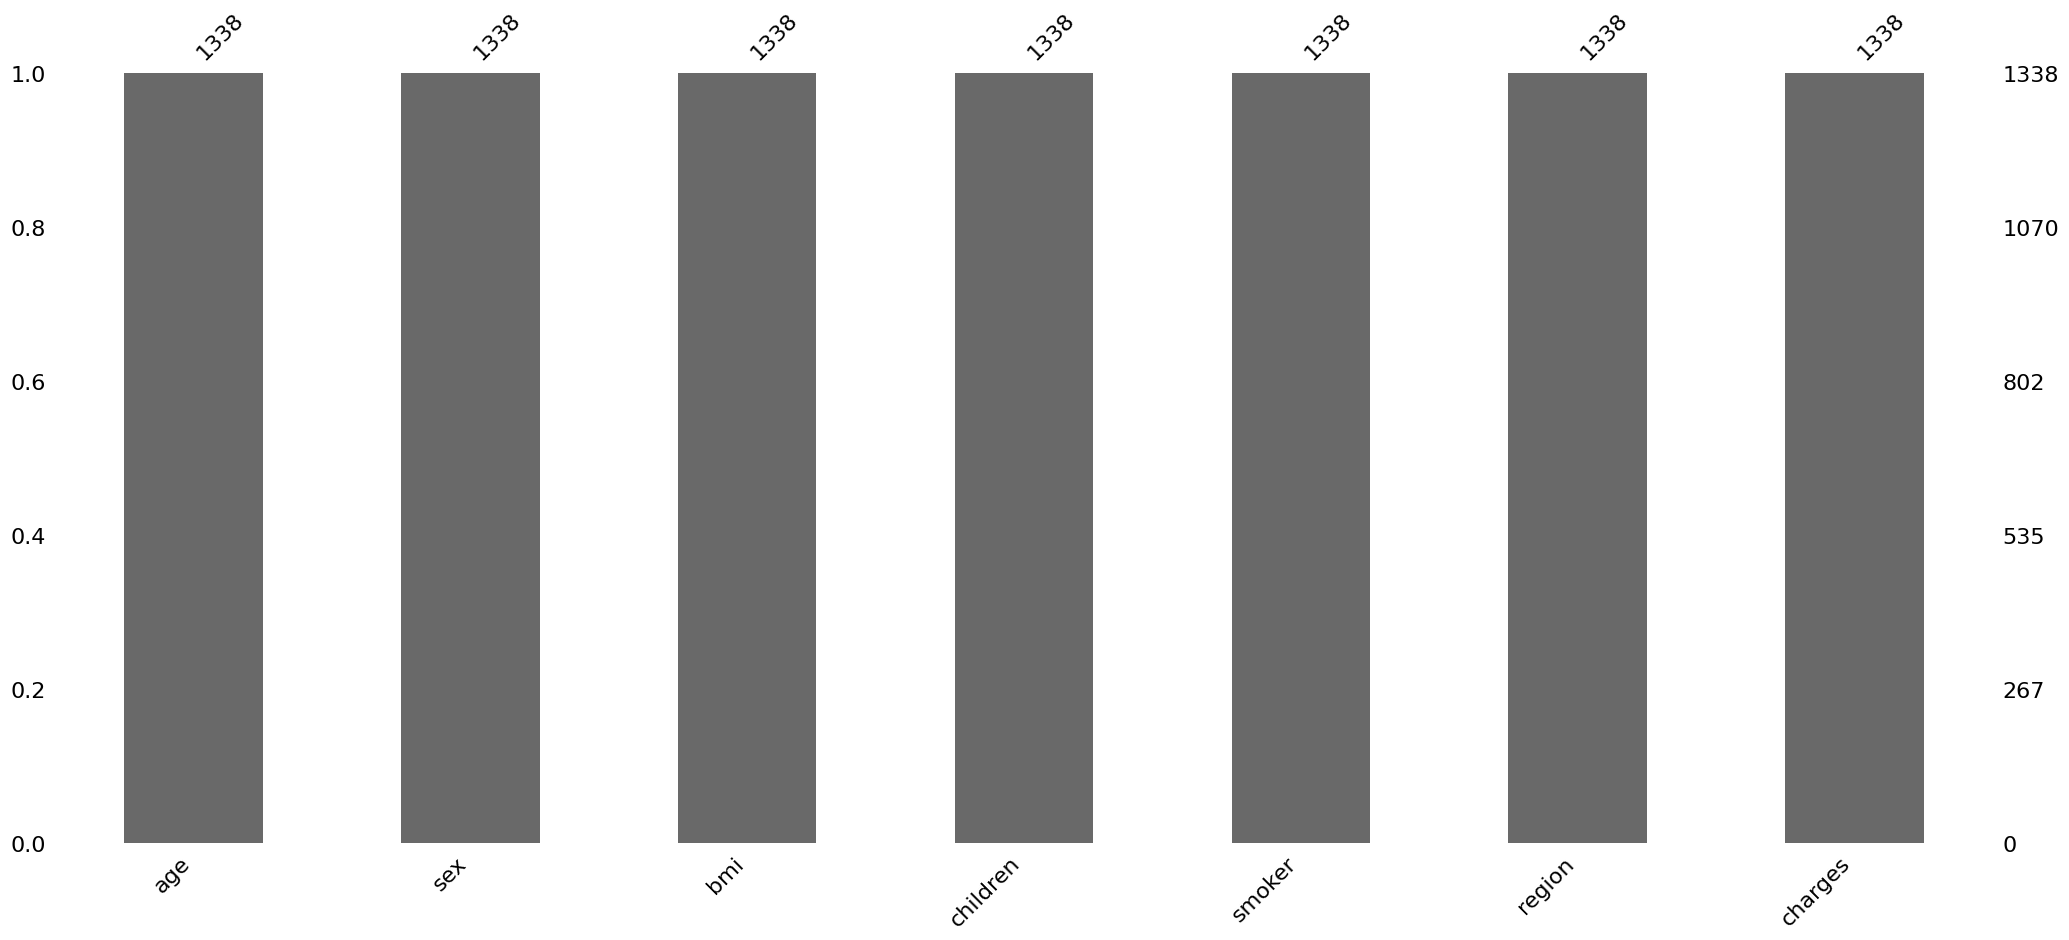

In [106]:
# Gives a bar chart of the missing values
# Package imports
import seaborn as sns
import pandas as pd
import missingno as msno
%matplotlib inline
msno.bar(df)
#not equal bar size meaning missing values

<AxesSubplot:>

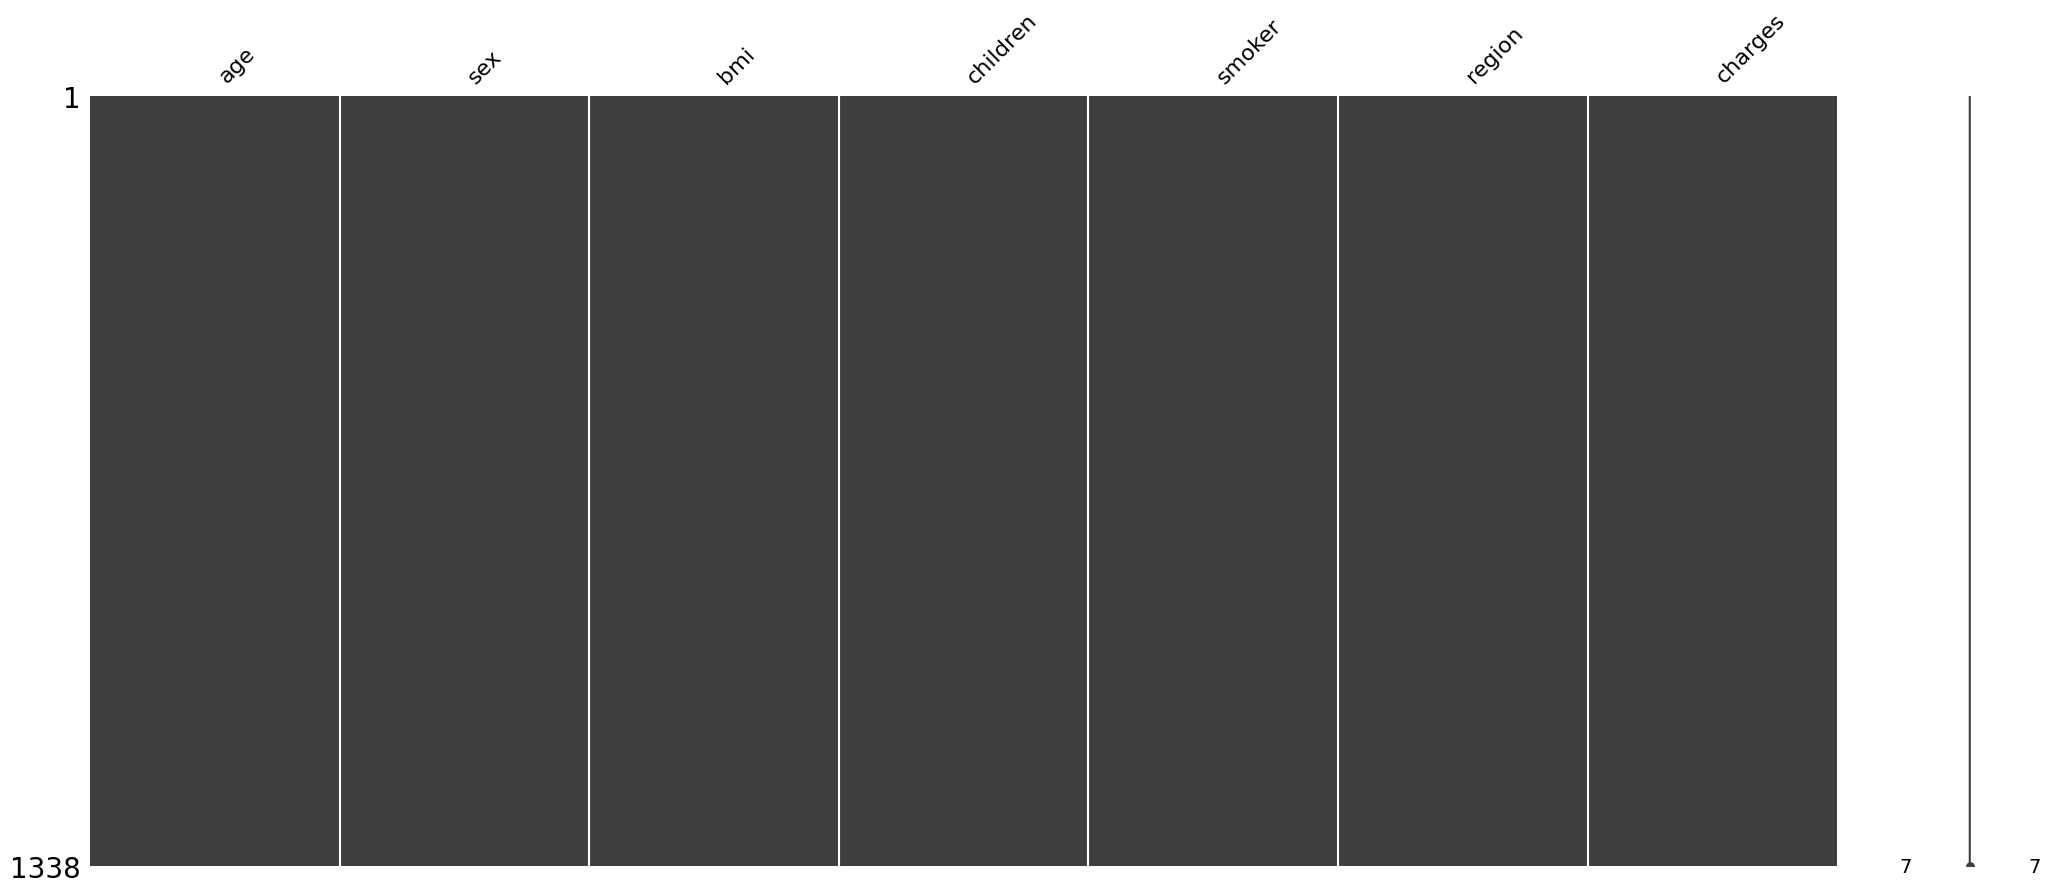

In [108]:
# Gives positional information of the missing values
msno.matrix(df)
#blurr or little white color indicating missing values

<AxesSubplot:>

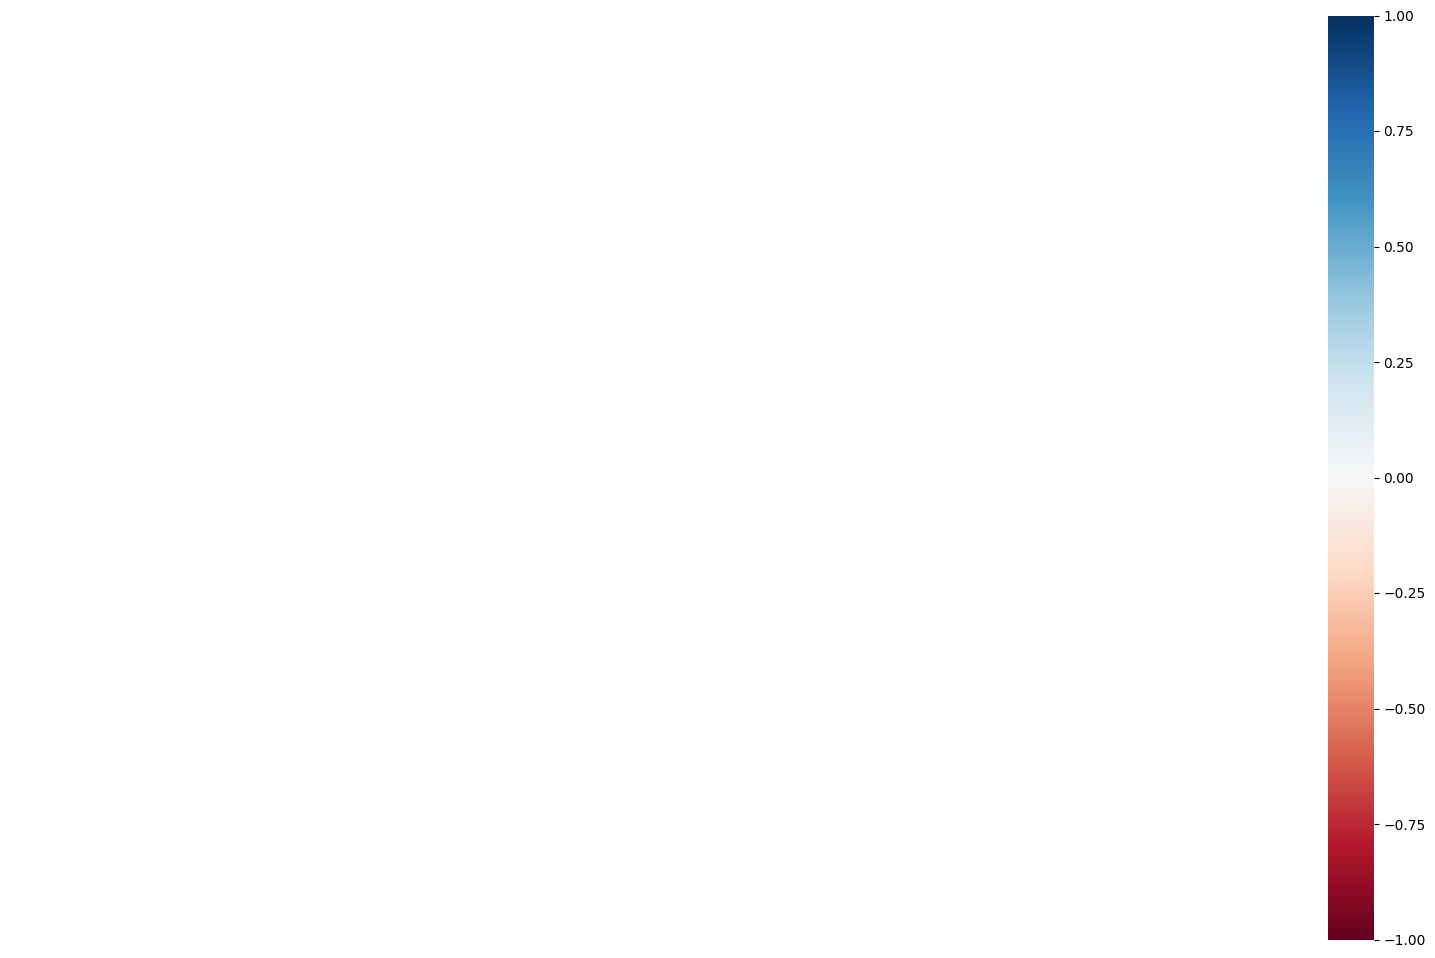

In [109]:
# Gives a heatmap of how missing values are related
msno.heatmap(df)

In [126]:
df['age'] = df["age"].astype(float)

In [144]:
updated_df = df
updated_df['ageismissing'] = updated_df['age'].isnull()
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values='NAN', strategy='constant', fill_value="work-from-home")
data_new = my_imputer.fit_transform(updated_df)
updated_df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   float64
 1   sex           1338 non-null   int64  
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   Ageismissing  1338 non-null   bool   
 8   bmiismissing  1338 non-null   bool   
 9   ageismissing  1338 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(2)
memory usage: 77.2+ KB


In [ ]:
imp = SimpleImputer(missing_values='NAN', strategy='constant', fill_value="work-from-home
imp = SimpleImputer(missing_values='NAN', strategy='median', fill_value=None)

In [131]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   float64
 1   sex           1338 non-null   int64  
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   Ageismissing  1338 non-null   bool   
 8   bmiismissing  1338 non-null   bool   
 9   ageismissing  1338 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(2)
memory usage: 77.2+ KB


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df.head()
testdf = df[df['age'].isnull()==True]
traindf = df[df['age'].isnull()==False]
y = traindf['age']
traindf.drop("age",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("age",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['age']= pred